# Project: Investigate a Dataset - [TMDb Movie Data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#resources">Resources</a></li>
</ul>

<a id='intro'></a>
## Introduction

>In this project I will be analyzing one of the five provided datasets which is **The Movies Database (TMDb)** which contains informations of more than 10,000 movies.
>
> The questions I am going to ask is:  
**1. What is the distribution of profit precentage?**  
**2. How can some various factors affect the movie profit?**
>
> First we will take a look on the distribution of profit precentage to determine if most of the movies achieve higher profit or lower profit and we want to look for some of the factors which can affect the movie profit so we are going to look on the budget, release year, popularity and revenue variables.

> First I am going to import the required packages to procced with the analysis:

In [1]:
import pandas as pd # importing pandas package to work with the dataframe
import matplotlib.pyplot as plt # importing pyplot from matplotlib
# using magic command in jupyter to enable inline display of plots without calling show() function
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> Now I am going to load the the movies dataframe **('tmdb-movies.csv')** using pandas:

In [2]:
df = pd.read_csv('tmdb-movies.csv')

> Now lets check for the general properties of the dataframe using head() and info() functions:

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Data Cleaning
> Now I will drop all the columns which we are not going to used and keep: **popularity/budget_adj/release_year/revenue_adj**
> We are using budget_adj and revenue_adj instead of budget and revenue for fair comaprison due to infliation over time.

In [5]:
columns = ['id','imdb_id','cast','homepage','director','tagline','overview','runtime','genres','production_companies'
           ,'vote_count','release_date','budget','revenue','vote_average', 'original_title', 'keywords']
df.drop(columns=columns, inplace=True)

> Lets check the dataframe to confirm the changes:

In [6]:
df.head()

,popularity,release_year,budget_adj,revenue_adj
0,32.985763,2015,1.379999e+08,1.392446e+09
1,28.419936,2015,1.379999e+08,3.481613e+08
2,13.112507,2015,1.012000e+08,2.716190e+08
3,11.173104,2015,1.839999e+08,1.902723e+09
4,9.335014,2015,1.747999e+08,1.385749e+09


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 4 columns):
popularity      10866 non-null float64
release_year    10866 non-null int64
budget_adj      10866 non-null float64
revenue_adj     10866 non-null float64
dtypes: float64(3), int64(1)
memory usage: 339.7 KB


> Before moving into exploratory data analysis lets check if there is any null values:

In [8]:
df.isna().sum()

popularity      0
release_year    0
budget_adj      0
revenue_adj     0
dtype: int64

> There isn't any null values so lets move into exploratory data analysis:

<a id='eda'></a>
## Exploratory Data Analysis

> Before starting with the analysis we will add some important functions to reduce repititive code:

In [9]:
# function to calculate profit precentage
def calc_profit_precent(revenue, budget):
    profit = revenue - budget
    profit_precent = (profit/revenue) * 100
    return profit_precent

In [10]:
# function to reduce the code for plotting
def custom_plot(v1, v2, sv1, sv2, labels, title, xlabel, ylabel):
    figure, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 12)) # Setting up 3 rows subplots with figure size of (12, 12)
    BarVar = axes[0].bar(x=labels, label=labels, height=[v1, v2] , edgecolor = 'black', alpha=0.8) # Setting up bar chart
    axes[0].set_ylim(0, 100) # Setting Y limit
    axes[0].set_title(title) # Set chart title
    axes[0].set_xlabel(xlabel) # Set X label
    axes[0].set_ylabel(ylabel) # Set Y label
    
    axes[1].scatter(range(len(sv1)), sv1) # Setting up scatter plot for series variable 1
    axes[1].set_xlabel(labels[0]) # Set X label
    # Removing tick labels
    axes[1].set_xticklabels([])
    axes[1].set_xticks([])
    
    axes[2].scatter(range(len(sv2)), sv2) # Setting up scatter plot for series variable 2
    axes[2].set_xlabel(labels[1]) # Set X label
    # Removing tick labels
    axes[2].set_xticklabels([])
    axes[2].set_xticks([])

### Research Question - (What is the distribution of profit precentage?)

> To get the profit distribution first we need to get the profit precentage for all the movies:

In [11]:
# Calculate profit precentage
profit_list = calc_profit_precent(df['revenue_adj'], df['budget_adj'])
# Remove any movies with profit precentage less than 0
profit_list = profit_list[(profit_list >= 0)]

> Then we will visualize the results using scatter plot:

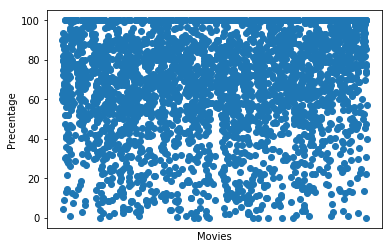

In [12]:
# Setting up scatter plot
plt.scatter(range(len(profit_list)), profit_list)
plt.xlabel('Movies') # Set X label
plt.ylabel('Precentage') # Set Y label
# Removing tick labels
plt.xticks([]);

### Research Question - (How can some various factors affect the movie profit?)
> Now we want to see how the budget can affect the revenue so lets see if movies assosiated with higher budget recieve higher profit:

> We will get the budget average for all the movies:

In [13]:
budget_mean = df['budget_adj'].mean()
budget_mean

17551039.82288678

> We can see that the budget average is equal to **17.5M** dollar

> Then we will split the movies into two lists one for the movies that has budget above the average, the second one is for the movies that has budget below the average then we will get the average profit precentage for both of the lists:

In [14]:
# Create two list one contains the movies with budget above average and the sceond for the movies with budget below average
ab_budget = df.query('budget_adj > @budget_mean')
bl_budget = df.query('budget_adj <= @budget_mean')

In [15]:
ab_budget_mean = ab_budget['budget_adj']
bl_budget_mean = bl_budget['budget_adj']

ab_revenue_mean = ab_budget['revenue_adj']
bl_revenue_mean = bl_budget['revenue_adj']

# In here we will get the average profit precentage for both the lists
ab_budget_profit_precent = calc_profit_precent(ab_revenue_mean.mean(), ab_budget_mean.mean())
bl_budget_profit_precent = calc_profit_precent(bl_revenue_mean.mean(), bl_budget_mean.mean())
# Now for the scatter plot we will get the profit precentage for all the movies in both of the lists
sr_ab_profit_precent = calc_profit_precent(ab_revenue_mean, ab_budget_mean)
sr_bl_profit_precent = calc_profit_precent(bl_revenue_mean, bl_budget_mean)
# Now we will remove all the movies that has profit less than 0
sr_ab_profit_precent = sr_ab_profit_precent[(sr_ab_profit_precent >= 0)]
sr_bl_profit_precent = sr_bl_profit_precent[(sr_bl_profit_precent >= 0)]

> Then we will visualize the results in bar chart and scatterplot using matplotlib:

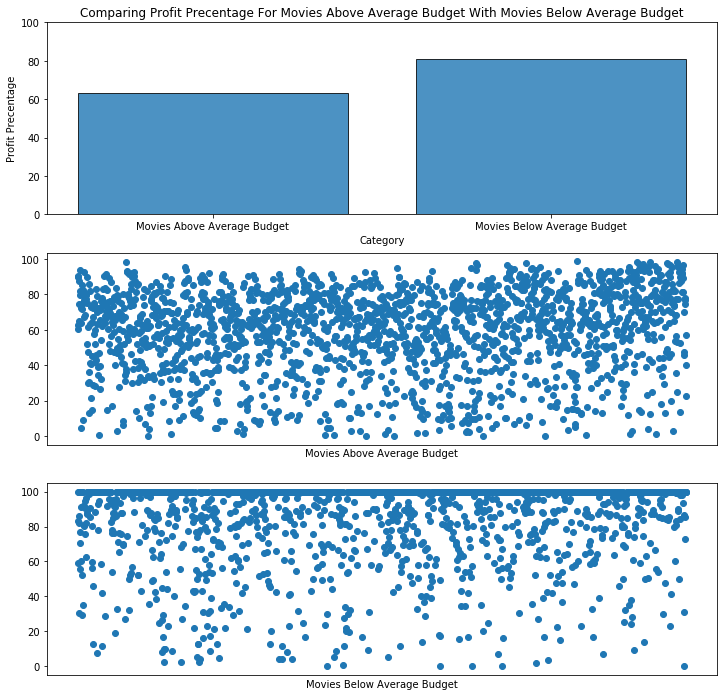

In [16]:
budget_plot_labels = ['Movies Above Average Budget', 'Movies Below Average Budget']
title = 'Comparing Profit Precentage For Movies Above Average Budget With Movies Below Average Budget'

custom_plot(ab_budget_profit_precent, bl_budget_profit_precent, sr_ab_profit_precent, sr_bl_profit_precent
            ,budget_plot_labels, title, 'Category', 'Profit Precentage')

> I used a bar chart because its useful to comapre categorical data by comparing the length of the bars, and a scatter plot was used to visualize the correlation of the movies in each list.

> Now lets see how the popularity can affect the profit, first we start by getting the average popularity of the movies:

In [17]:
popularity_mean = df['popularity'].mean()

> Then we will split the movies into two lists one for the movies that has popularity above the average, the second one is for the movies that has popularity below the average:

In [18]:
# Create two list one contains the movies with popularity above average and the sceond for the movies with popularity below average
ab_popul = df.query('popularity > @popularity_mean')
bl_popul = df.query('popularity <= @popularity_mean')

> Then we use similar process that was used for the budget:

In [19]:
ab_budget_mean = ab_popul['budget_adj']
bl_budget_mean = bl_popul['budget_adj']

ab_revenue_mean = ab_popul['revenue_adj']
bl_revenue_mean = bl_popul['revenue_adj']

# In here we will get the average profit precentage for both the lists
ab_popul_profit_precent = calc_profit_precent(ab_revenue_mean.mean(), ab_budget_mean.mean())
bl_popul_profit_precent = calc_profit_precent(bl_revenue_mean.mean(), bl_budget_mean.mean())
# Now for the scatter plot we will get the profit precentage for all the movies in both of the lists
sr_ab_profit_precent = calc_profit_precent(ab_revenue_mean, ab_budget_mean)
sr_bl_profit_precent = calc_profit_precent(bl_revenue_mean, bl_budget_mean)
# Now we will remove all the movies that has profit less than 0
sr_ab_profit_precent = sr_ab_profit_precent[(sr_ab_profit_precent >= 0)]
sr_bl_profit_precent = sr_bl_profit_precent[(sr_bl_profit_precent >= 0)]

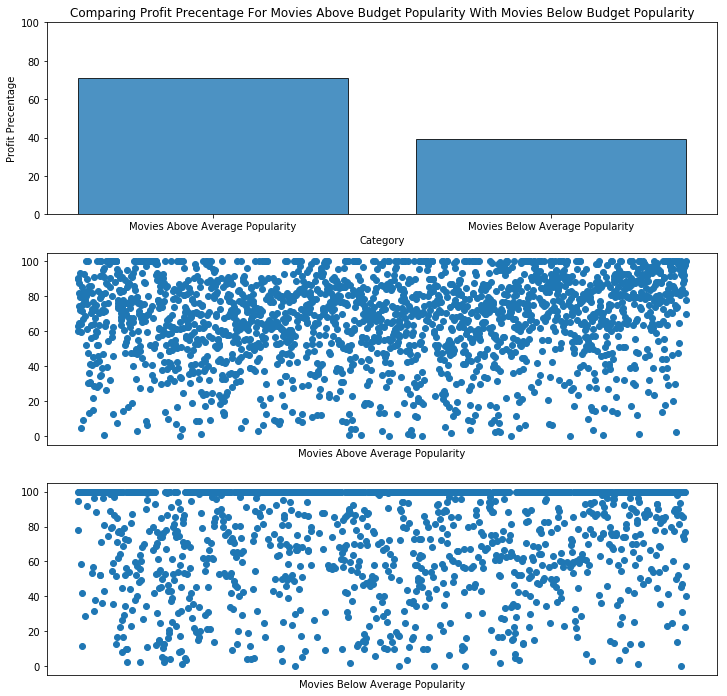

In [20]:
budget_plot_labels = ['Movies Above Average Popularity', 'Movies Below Average Popularity']
title = 'Comparing Profit Precentage For Movies Above Budget Popularity With Movies Below Budget Popularity'

custom_plot(ab_popul_profit_precent, bl_popul_profit_precent, sr_ab_profit_precent, sr_bl_profit_precent
            ,budget_plot_labels, title, 'Category', 'Profit Precentage')

> Now for the release year we will create two lists one for movies that was produced before 1991 and one for movies that was produced after 1991:

In [21]:
newer_movies = df.query('release_year > 2000')
older_movies = df.query('release_year <= 2000')

In [22]:
new_budget_mean = newer_movies['budget_adj']
old_budget_mean = older_movies['budget_adj']

new_revenue_mean = newer_movies['revenue_adj']
old_revenue_mean = older_movies['revenue_adj']

# In here we will get the average profit precentage for both the lists
new_profit_precent = calc_profit_precent(new_revenue_mean.mean(), new_budget_mean.mean())
old_profit_precent = calc_profit_precent(old_revenue_mean.mean(), old_budget_mean.mean())
# Now for the scatter plot we will get the profit precentage for all the movies in both of the lists
sr_ab_profit_precent = calc_profit_precent(new_revenue_mean, new_budget_mean)
sr_bl_profit_precent = calc_profit_precent(old_revenue_mean, old_budget_mean)
# Now we will remove all the movies that has profit less than 0
sr_ab_profit_precent = sr_ab_profit_precent[(sr_ab_profit_precent >= 0)]
sr_bl_profit_precent = sr_bl_profit_precent[(sr_bl_profit_precent >= 0)]

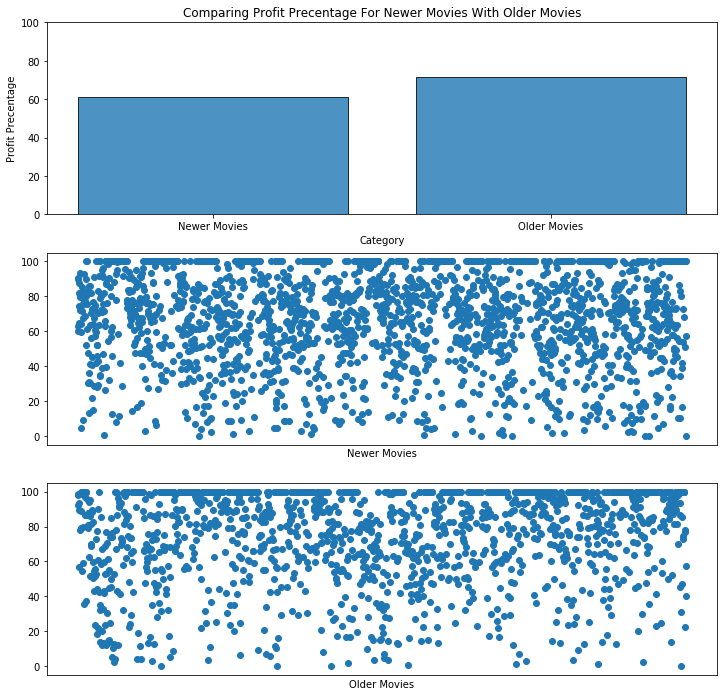

In [23]:
budget_plot_labels = ['Newer Movies', 'Older Movies']
title = 'Comparing Profit Precentage For Newer Movies With Older Movies'

custom_plot(new_profit_precent, old_profit_precent, sr_ab_profit_precent, sr_bl_profit_precent
            ,budget_plot_labels, title, 'Category', 'Profit Precentage')

<a id='conclusions'></a>
## Conclusions

> **Results:** Based on the analysis we can see that most of the movies got high profit precentage and we can see that movies with budget higher than the average budget doesn't recieve as much profit as movies with budget lower than the average budget and movies with higher popularity recieve higher profit than movies with lower popularity and older movies got higher profit than newer movies.  
> **Limitations:** All movies with negative profit has been removed which has introduced bias in the results.

<a id='resources'></a>
## Resources

> Pandas docs: https://pandas.pydata.org/pandas-docs/stable/
>
> Matplotlib docs: https://matplotlib.org/stable/api/